## Expectations

**Functions**

`np.random.RandomState`, `RandomState.standard_normal`, `RandomState.standard_t`, `RandomState.chi2`,
`np.exp`, `np.mean`, `np.std`, `scipy.integrate.quadrature`, `scipy.integrate.quad`

### Exercise 11

Compute $E\left[X\right]$, $E\left[X^{2}\right]$, $V\left[X\right]$ and the kurtosis of $X$ using Monte Carlo integration when $X$ is distributed:

1. Standard Normal
2. $N\left(0.08,0.2^{2}\right)$
3. Students $t_{8}$
4. $\chi_{5}^{2}$



In [54]:
import numpy as np
rs = np.random.RandomState(30092019)
reps = 1000000

In [55]:
x = rs.standard_normal(reps)
import pandas as pd
def sum_stats(x):
    mu = np.mean(x)
    mu2 = np.mean(x**2)
    var = mu2 - mu**2
    kurt = np.mean(((x-mu) ** 4)) / var**2
    index = ["Expectation", "Squared Expectation", "Variance", "Kurtosis"]

    return pd.DataFrame([mu, mu2, var, kurt], index = index)

In [56]:
std_normal = sum_stats(x)
std_normal

,0
Expectation,0.000612
Squared Expectation,1.002473
Variance,1.002472
Kurtosis,3.001245


In [57]:
y = rs.normal(0.08, 0.2, size =reps)
Normal = sum_stats(y)

In [58]:
c = rs.standard_t(8, size = reps)
c_stats = sum_stats(c)
c_stats

,0
Expectation,0.000914
Squared Expectation,1.334596
Variance,1.334595
Kurtosis,4.396826


In [59]:
a = rs.chisquare(5, size = reps)
a_stats = sum_stats(a)

In [60]:
summary_statistics = pd.concat([std_normal, Normal, c_stats, a_stats], axis = 1,)
summary_statistics

,0,0,0,0
Expectation,0.000612,0.079985,0.000914,4.999680
Squared Expectation,1.002473,0.046354,1.334596,35.022455
Variance,1.002472,0.039957,1.334595,10.025658
Kurtosis,3.001245,3.003247,4.396826,5.468461


In [61]:
summary_statistics.columns = ["Standard Normal", "Normal", "Standard t", "Chi Squared"]
summary_statistics

,Standard Normal,Normal,Standard t,Chi Squared
Expectation,0.000612,0.079985,0.000914,4.999680
Squared Expectation,1.002473,0.046354,1.334596,35.022455
Variance,1.002472,0.039957,1.334595,10.025658
Kurtosis,3.001245,3.003247,4.396826,5.468461


Standard Normal

$t_8$

$\chi^2_5$

$N(8\%, 20\%^2)$

Function are useful for avoiding many blocks of repetitive code.

### Exercise 12 

1. Compute $E\left[\exp\left(X\right)\right]$ when $X\sim N\left(0.08,0.2^{2}\right)$.
2. Compare this to the analytical result for a Log-Normal random variable.


In [69]:
reps = 1000000

In [70]:
x = rs.normal(0.08, 0.2, size=reps)
mu_exp = np.mean(np.exp(x))
mu_exp

1.1048390943222197

In [71]:
analytical = np.exp(0.08 + 0.2**2/2)
analytical

1.1051709180756477

### Exercise 13

Explore the role of uncertainty in Monte Carlo integration by increasing the number of simulations 300% relative to the base case.

In [72]:
import matplotlib.pyplot as plt

In [93]:
base_reps = 40000
x = rs.standard_normal((base_reps, 100))
x.shape

(40000, 100)

In [94]:
mus = np.mean(x, axis=0)
mus.shape

(100,)

In [95]:
std = np.std(mus)
std

0.005283652603264907

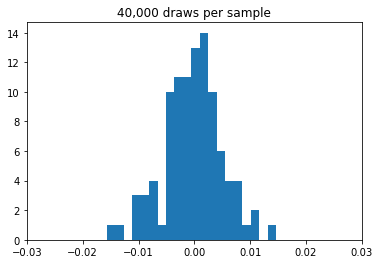

In [96]:
plt.hist(mus, bins = 20)
plt.title("40,000 draws per sample")
plt.xlim(-0.03,0.03)
plt.show()

In [ ]:
# spread a lot less widely with more simulations

### Exercise 14

Compute the $N(8\%, 20\%^2)$  expectation in exercise 11 using quadrature.

**Note**: This requires writing a function which will return $\exp\left(x\right)\times\phi\left(x\right)$ where $\phi\left(x\right)$ is the pdf evaluated at $x$.

In [97]:
import scipy.stats as stats
from scipy.integrate import quadrature, romberg

In [98]:
def f(x):
    return np.exp(x) * stats.norm.pdf(x, 0.08, 0.2)

In [99]:
res, err = quadrature(f, -5*0.2, 5*0.2)
res

1.1051649239632353

In [101]:
res = romberg(f,-5*0.2, 5*0.2)
res

1.1051649244195154

### Exercise 15 

**Optional** (Much more challenging)

Suppose log stock market returns are distributed according to a Students t with 8 degrees of
freedom, mean 8% and volatility 20%. Utility maximizers hold a portfolio consisting of a
risk-free asset paying 1% and the stock market. Assume that they are myopic and only care
about next period wealth, so that 

$$U\left(W_{t+1}\right)=U\left(\exp\left(r_{p}\right)W_{t}\right)$$

and that $U\left(W\right)=\frac{W^{1-\gamma}}{1-\gamma}$ is CRRA with risk aversion $\gamma$.
The portfolio return is $r_{p}=wr_{s}+\left(1-w\right)r_{f}$ where $s$ is for stock market
and $f$ is for risk-free. A 4th order expansion of this utility around the expected wealth
next period is

$$E_{t}\left[U\left(W_{t+1}\right)\right]\approx\phi_{0}+\phi_{1}\mu_{1}^{\prime}+\phi_{2}\mu_{2}^{\prime}+\phi_{3}\mu_{3}^{\prime}+\phi_{4}\mu_{4}^{\prime}$$

where

$$\phi_{j}=\left(j!\right)^{-1}U^{\left(j\right)}\left(E_{t}\left[W_{t+1}\right]\right),$$

$$U^{(j)}=\frac{\partial^{j}U}{\partial W^{j}},$$

$$\mu_{k}^{\prime}=E_{t}\left[\left(r-\mu\right)_{p}^{k}\right],$$

and $\mu=E_{t}\left[r_{p}\right]$. Use Monte Carlo integration to examine how the weight in
the stock market varies as the risk aversion varies from 1.5 to 10. Note that when $\gamma=1$, $U\left(W\right)=\ln\left(W\right)$.
Use $W_{t}=1$ without loss of generality since the portfolio problem is homogeneous of degree 0 in wealth.